## Testing import_data and working with data

In [13]:
!ls ../models_library/raw_models/

DunedinPoAm.csv			 McCartneyBlood_2018_BMI.csv
EpiTOC2.csv			 McCartneyBlood_2018_Education.csv
HannumBlood_2013.csv		 McCartneyBlood_2018_HDL.csv
HannumBreast_2013.csv		 McCartneyBlood_2018_LDL.csv
HannumKidney_2013.csv		 McCartneyBlood_2018_Smoking.csv
HannumLung_2013.csv		 McCartneyBlood_2018_TC.csv
HorvathMultiShrunken_2013.csv	 McCartneyBlood_2018_TotalFat.csv
HorvathMulti_2013.csv		 McCartneyBlood_2018_WaistTipRatio.csv
KnightBlood_2016.csv		 PhenoAge.csv
LinBlood3CpG_2016.csv		 YingAdaptAge.csv
LinBlood99CpG_2016.csv		 YingCausAge.csv
McCartneyBlood_2018_Alcohol.csv  YingDamAge.csv


In [1]:
import numpy as np
import pandas as pd 


In [2]:
import sys
import os


data_library = os.path.abspath('../data_library')
sys.path.append(data_library)

from data_repository import import_data




In [3]:
! ls ../data_library/

__init__.py  __pycache__  data_repository.py  data_test.csv


In [4]:
SAMPLE_ID = 'GSE41169_series_matrix.txt'
URL = 'https://drive.google.com/file/d/1cZca-FHnfeUerXJOzqhnH34mUYjNOgba/view?usp=sharing'
data_test = import_data(SAMPLE_ID, URL)


485579 30


In [9]:
model_filepath = '../models_library/raw_models/HannumLung_2013.csv'

model_data = pd.read_csv(model_filepath)
features = model_data[['Feature_ID']]
coefficients = model_data[['Coef']]


In [5]:
data_test

,ID_REF,GSM1009660,GSM1009661,GSM1009662,GSM1009663,GSM1009664,GSM1009665,GSM1009666,GSM1009667,GSM1009668,...,GSM1009679,GSM1009680,GSM1009681,GSM1009682,GSM1009683,GSM1009684,GSM1009685,GSM1009686,GSM1009687,GSM1009688
0,cg00000029,0.454931,0.410287,0.375603,0.487200,0.380866,0.319248,0.364079,0.419343,0.423544,...,0.428755,0.210384,0.449569,0.400480,0.435775,0.338569,0.396737,0.356990,0.462454,0.429430
1,cg00000108,0.907883,0.915894,0.939018,0.933975,0.939008,0.951529,0.924580,0.915472,0.934989,...,0.935265,0.924555,0.955041,0.928616,0.937925,0.941029,0.940394,0.937423,0.932180,0.925551
2,cg00000109,0.862772,0.881000,0.889573,0.852267,0.844250,0.863024,0.909848,0.826795,0.910052,...,0.887857,0.766215,0.880007,0.871054,0.860864,0.880107,0.822451,0.888035,0.890643,0.889616
3,cg00000165,0.160446,0.137600,0.188573,0.112618,0.119975,0.131921,0.108218,0.132647,0.165771,...,0.159710,0.120410,0.146467,0.132461,0.131419,0.102774,0.121714,0.129066,0.129448,0.155817
4,cg00000236,0.728180,0.736708,0.601186,0.659397,0.669548,0.632081,0.660207,0.693360,0.712032,...,0.744013,0.671896,0.691565,0.691004,0.685555,0.646149,0.645442,0.721664,0.674724,0.724572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485572,rs9363764,0.530962,0.945385,0.962389,0.503054,0.509715,0.945157,0.536737,0.044024,0.954359,...,0.953008,0.101359,0.479536,0.956382,0.045505,0.944528,0.510115,0.538455,0.513300,0.506395
485573,rs939290,0.507332,0.472005,0.507533,0.974193,0.963453,0.534800,0.969639,0.494921,0.965082,...,0.973186,0.963486,0.020040,0.026232,0.022622,0.498687,0.505080,0.973046,0.483865,0.966675
485574,rs951295,0.040520,0.039885,0.040025,0.549087,0.540715,0.939570,0.532317,0.522733,0.534477,...,0.534097,0.509521,0.536320,0.955842,0.537719,0.044697,0.963377,0.532193,0.040547,0.036465
485575,rs966367,0.923563,0.032825,0.477915,0.945543,0.449110,0.492202,0.478855,0.446961,0.443287,...,0.951256,0.049607,0.952887,0.476839,0.935937,0.460778,0.032539,0.498351,0.441584,0.467843


In [28]:
df = data_test.copy()
df.columns = df.iloc[0]
df.columns = df.columns.str.replace('"', '')
df = df[1:]
df = df.reset_index(drop=True)
df.ID_REF = df.ID_REF.str.replace('"', '')


In [38]:
samples = list(df.columns)[1:]

In [42]:
df[samples] = df[samples].apply(pd.to_numeric)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485577 entries, 0 to 485576
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID_REF      485577 non-null  object 
 1   GSM1009660  485577 non-null  float64
 2   GSM1009661  485577 non-null  float64
dtypes: float64(2), object(1)
memory usage: 11.1+ MB


In [10]:
df_merged = df.merge(model_data, left_on='ID_REF', right_on='Feature_ID', how='right')

In [11]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID_REF      14 non-null     object 
 1   GSM1009660  14 non-null     float64
 2   GSM1009661  14 non-null     float64
 3   GSM1009662  14 non-null     float64
 4   GSM1009663  14 non-null     float64
 5   GSM1009664  14 non-null     float64
 6   GSM1009665  14 non-null     float64
 7   GSM1009666  14 non-null     float64
 8   GSM1009667  14 non-null     float64
 9   GSM1009668  14 non-null     float64
 10  GSM1009669  14 non-null     float64
 11  GSM1009670  14 non-null     float64
 12  GSM1009671  14 non-null     float64
 13  GSM1009672  14 non-null     float64
 14  GSM1009673  14 non-null     float64
 15  GSM1009674  14 non-null     float64
 16  GSM1009675  14 non-null     float64
 17  GSM1009676  14 non-null     float64
 18  GSM1009677  14 non-null     float64
 19  GSM1009678  14 non-null     flo

In [16]:
model_data.shape

(14, 3)

In [13]:
df_merged.shape

(14, 33)

In [49]:
vectors = np.array(df_merged[samples].to_numpy())

In [71]:
coefficients

,Coef
0,-3.440
1,-22.800
2,48.800
3,8.500
4,3.950
5,40.300
6,-63.500
7,22.700
8,-0.885
9,24.800


In [65]:
features_array = np.array(coefficients)

In [55]:
vectors.shape

(14, 2)

In [60]:
vectors[:, 0]

array([0.09197747, 0.3159195 , 0.5040356 , 0.05984634, 0.1030878 ,
       0.01129568, 0.7679211 , 0.07017164, 0.04656127, 0.01154639,
       0.05297833, 0.158752  , 0.2492757 , 0.03991627])

In [58]:
vectors.transpose()

array([[0.09197747, 0.3159195 , 0.5040356 , 0.05984634, 0.1030878 ,
        0.01129568, 0.7679211 , 0.07017164, 0.04656127, 0.01154639,
        0.05297833, 0.158752  , 0.2492757 , 0.03991627],
       [0.06034835, 0.2680101 , 0.4410885 , 0.05883182, 0.07369265,
        0.00422823, 0.9013712 , 0.04339134, 0.02392316, 0.00620221,
        0.03814023, 0.1065092 , 0.1649368 , 0.02257136]])

In [68]:
features_array.transpose()

array([[ -3.44 , -22.8  ,  48.8  ,   8.5  ,   3.95 ,  40.3  , -63.5  ,
         22.7  ,  -0.885,  24.8  ,  -0.863,  50.9  ,  -3.75 ,  44.   ]])

In [61]:
vectors

array([[0.09197747, 0.06034835],
       [0.3159195 , 0.2680101 ],
       [0.5040356 , 0.4410885 ],
       [0.05984634, 0.05883182],
       [0.1030878 , 0.07369265],
       [0.01129568, 0.00422823],
       [0.7679211 , 0.9013712 ],
       [0.07017164, 0.04339134],
       [0.04656127, 0.02392316],
       [0.01154639, 0.00620221],
       [0.05297833, 0.03814023],
       [0.158752  , 0.1065092 ],
       [0.2492757 , 0.1649368 ],
       [0.03991627, 0.02257136]])

In [113]:
prediction = np.matmul( features_array.transpose(), vectors)

In [86]:
np.array(samples).shape

(2,)

In [89]:
dict(zip(samples, list(prediction)))

{'GSM1009660': array([-19.61998458, -34.18797063])}

In [102]:
for a, b in zip(samples, np.transpose(prediction)):
    print(a)
    l = b.item()
    print(l)

GSM1009660
-19.619984580540006
GSM1009661
-34.187970631690014


In [82]:
{A: B for A, B in zip(np.array(samples), prediction)}

{'GSM1009660': array([-19.61998458, -34.18797063])}

In [108]:
pred_dict = {}
for a, b in zip(samples, np.transpose(prediction)):
    pred_dict.update({a:b.item()})

pd.DataFrame.from_dict(pred_dict, orient='index', columns = ['prediction'])


,prediction
GSM1009660,-19.619985
GSM1009661,-34.187971


In [114]:
pd_prediction = pd.DataFrame()
pd_prediction['sample'] = samples
pd_prediction['predictions'] = prediction.transpose()

pd_prediction

,sample,predictions
0,GSM1009660,-19.619985
1,GSM1009661,-34.187971


In [122]:
df.to_csv('../data_library/data_test.csv', sep='\t', index=False)

In [5]:
df = pd.read_csv('../data_library/data_test.csv', sep = '\t')

In [7]:
df.head()

,ID_REF,GSM1009660,GSM1009661
0,cg00000029,0.454931,0.410287
1,cg00000108,0.907883,0.915894
2,cg00000109,0.862772,0.881000
3,cg00000165,0.160446,0.137600
4,cg00000236,0.728180,0.736708


## PART, that may become an example 

In [1]:
import sys
import os

import numpy as np
import pandas as pd 

data_library = os.path.abspath('../data_library')
sys.path.append(data_library)

from data_repository import import_data
from base import LinearMethylationModel


In [2]:
#SAMPLE_ID = 'GSE41169_series_matrix.txt'
#URL = 'https://drive.google.com/file/d/1cZca-FHnfeUerXJOzqhnH34mUYjNOgba/view?usp=sharing'
#data_test = import_data(SAMPLE_ID, URL)
#df = data_test.copy()
#df.to_csv('../data_library/data_test2.csv', sep='\t', index=False)
df = pd.read_csv('../data_library/data_test2.csv', sep='\t')

In [3]:
raw_models = '../models_library/raw_models/'
model_filepath = '../models_library/raw_models/HannumLung_2013.csv'
hannum_blood = '../models_library/raw_models/HannumBlood_2013.csv'
yingcauseage = os.path.join(raw_models, 'YingCausAge.csv' )

In [4]:
X = df.iloc[:-1,:].copy()
y = df.iloc[-1,:].copy()

In [5]:
X

,ID_REF,GSM1009660,GSM1009661,GSM1009662,GSM1009663,GSM1009664,GSM1009665,GSM1009666,GSM1009667,GSM1009668,...,GSM1009679,GSM1009680,GSM1009681,GSM1009682,GSM1009683,GSM1009684,GSM1009685,GSM1009686,GSM1009687,GSM1009688
0,cg00000029,0.454931,0.410287,0.375603,0.4872,0.380866,0.319248,0.364079,0.419343,0.423544,...,0.428755,0.210384,0.449569,0.40048,0.435775,0.338569,0.396737,0.35699,0.462454,0.42943
1,cg00000108,0.907883,0.915894,0.939018,0.933975,0.939008,0.951529,0.92458,0.915472,0.934989,...,0.935265,0.924555,0.955041,0.928616,0.937925,0.941029,0.940394,0.937423,0.93218,0.925551
2,cg00000109,0.862772,0.881,0.889573,0.852267,0.84425,0.863024,0.909848,0.826795,0.910052,...,0.887857,0.766215,0.880007,0.871054,0.860864,0.880107,0.822451,0.888035,0.890643,0.889616
3,cg00000165,0.160446,0.1376,0.188573,0.112618,0.119975,0.131921,0.108218,0.132647,0.165771,...,0.15971,0.12041,0.146467,0.132461,0.131419,0.102774,0.121714,0.129066,0.129448,0.155817
4,cg00000236,0.72818,0.736708,0.601186,0.659397,0.669548,0.632081,0.660207,0.69336,0.712032,...,0.744013,0.671896,0.691565,0.691004,0.685555,0.646149,0.645442,0.721664,0.674724,0.724572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485572,rs9363764,0.530962,0.945385,0.962389,0.503054,0.509715,0.945157,0.536737,0.044024,0.954359,...,0.953008,0.101359,0.479536,0.956382,0.045505,0.944528,0.510115,0.538455,0.5133,0.506395
485573,rs939290,0.507332,0.472005,0.507533,0.974193,0.963453,0.5348,0.969639,0.494921,0.965082,...,0.973186,0.963486,0.02004,0.026232,0.022622,0.498687,0.50508,0.973046,0.483865,0.966675
485574,rs951295,0.04052,0.039885,0.040025,0.549087,0.540715,0.93957,0.532317,0.522733,0.534477,...,0.534097,0.509521,0.53632,0.955842,0.537719,0.044697,0.963377,0.532193,0.040547,0.036465
485575,rs966367,0.923563,0.032825,0.477915,0.945543,0.44911,0.492202,0.478855,0.446961,0.443287,...,0.951256,0.049607,0.952887,0.476839,0.935937,0.460778,0.032539,0.498351,0.441584,0.467843


In [6]:
my_model = LinearMethylationModel(model_file_path=model_filepath)

predictions = my_model.predict(X)
predictions.head()

,sample,prediction
0,GSM1009660,-19.619985
1,GSM1009661,-34.187971
2,GSM1009662,-8.146963
3,GSM1009663,-37.836931
4,GSM1009664,-24.487007


In [7]:
hannum_blood_model = LinearMethylationModel(model_file_path=hannum_blood)
predictions = hannum_blood_model.predict(X)
predictions.head()

,sample,prediction
0,GSM1009660,35.009794
1,GSM1009661,25.911236
2,GSM1009662,65.536941
3,GSM1009663,15.512122
4,GSM1009664,31.191178


In [8]:
yingcauseage_model = LinearMethylationModel(model_file_path=yingcauseage)
yingcauseage_pred = yingcauseage_model.predict(X)
yingcauseage_pred['prediction']+= 86.80816381
yingcauseage_pred.head()

,sample,prediction
0,GSM1009660,30.325823
1,GSM1009661,18.853408
2,GSM1009662,52.948143
3,GSM1009663,16.553267
4,GSM1009664,31.180100


In [9]:
yingdamAge = os.path.join(raw_models,'YingDamAge.csv')
yingdamAge_model = LinearMethylationModel(yingdamAge)
yingdamAge_pred = yingdamAge_model.predict(X)
yingdamAge_pred['prediction']+= 543.4315887
yingdamAge_pred.head()

,sample,prediction
0,GSM1009660,34.840224
1,GSM1009661,48.188651
2,GSM1009662,54.754781
3,GSM1009663,40.738903
4,GSM1009664,62.281426


In [10]:
linblood_model = LinearMethylationModel(model_file_path=os.path.join(raw_models,'LinBlood99CpG_2016.csv'))
linblood_pred = linblood_model.predict(X) 
linblood_pred['prediction']+= 12.2169841 
linblood_pred.head()

,sample,prediction
0,GSM1009660,22.481143
1,GSM1009661,15.589432
2,GSM1009662,50.431606
3,GSM1009663,15.228030
4,GSM1009664,24.324188


In [11]:
phenoage_model = LinearMethylationModel(model_file_path=os.path.join(raw_models, 'PhenoAge.csv'))
phenoage_pred = phenoage_model.predict(X)
phenoage_pred['prediction']+= 60.664
phenoage_pred.head()

,sample,prediction
0,GSM1009660,28.115610
1,GSM1009661,19.577701
2,GSM1009662,60.543320
3,GSM1009663,11.328455
4,GSM1009664,27.627108


In [12]:
y

0
ID_REF        ages
GSM1009660      32
GSM1009661      24
GSM1009662      65
GSM1009663      25
GSM1009664      32
GSM1009665      30
GSM1009666      21
GSM1009667      21
GSM1009668      21
GSM1009669      24
GSM1009670      24
GSM1009671      34
GSM1009672      36
GSM1009673      65
GSM1009674      49
GSM1009675      20
GSM1009676      29
GSM1009677      33
GSM1009678      24
GSM1009679      45
GSM1009680      32
GSM1009681      29
GSM1009682      35
GSM1009683      30
GSM1009684      47
GSM1009685      32
GSM1009686      36
GSM1009687      27
GSM1009688      23
Name: 485577, dtype: object

In [13]:
y = df.iloc[-1,:].copy()
y = y.reset_index()
y = pd.DataFrame(y[1:])
y.columns = ['sample','actual age']
y.reset_index(inplace=True, drop=True)
y

,sample,actual age
0,GSM1009660,32
1,GSM1009661,24
2,GSM1009662,65
3,GSM1009663,25
4,GSM1009664,32
5,GSM1009665,30
6,GSM1009666,21
7,GSM1009667,21
8,GSM1009668,21
9,GSM1009669,24


In [14]:
models = [y,predictions,yingcauseage_pred,yingdamAge_pred,linblood_pred,phenoage_pred]
for ds in models:
    # set the first column as index
    ds.set_index(ds.columns[0], inplace=True)
general = pd.concat(models, axis=1, join='outer')
#general.columns = ['actual age', ]
general

,actual age,prediction,prediction,prediction,prediction,prediction
sample,,,,,,
GSM1009660,32,35.009794,30.325823,34.840224,22.481143,28.115610
GSM1009661,24,25.911236,18.853408,48.188651,15.589432,19.577701
GSM1009662,65,65.536941,52.948143,54.754781,50.431606,60.543320
GSM1009663,25,15.512122,16.553267,40.738903,15.228030,11.328455
GSM1009664,32,31.191178,31.180100,62.281426,24.324188,27.627108
GSM1009665,30,37.079390,23.395796,35.658655,26.436080,28.216666
GSM1009666,21,25.763743,14.836900,33.053512,17.868880,14.677186
GSM1009667,21,25.555333,16.036865,43.207681,21.250001,17.246441
GSM1009668,21,21.686343,20.297966,40.917446,14.750707,15.718556


In [15]:
general.columns = ['actual age', 'HannumBlood_2013', 'YingCausAge', 'YingDamAge', 'LinBlood99CpG_2016', 'PhenoAge' ]

In [19]:
general.set_index(general.columns[0], inplace=True)
general

,HannumBlood_2013,YingCausAge,YingDamAge,LinBlood99CpG_2016,PhenoAge
actual age,,,,,
32,35.009794,30.325823,34.840224,22.481143,28.115610
24,25.911236,18.853408,48.188651,15.589432,19.577701
65,65.536941,52.948143,54.754781,50.431606,60.543320
25,15.512122,16.553267,40.738903,15.228030,11.328455
32,31.191178,31.180100,62.281426,24.324188,27.627108
30,37.079390,23.395796,35.658655,26.436080,28.216666
21,25.763743,14.836900,33.053512,17.868880,14.677186
21,25.555333,16.036865,43.207681,21.250001,17.246441
21,21.686343,20.297966,40.917446,14.750707,15.718556


<Axes: xlabel='actual age'>

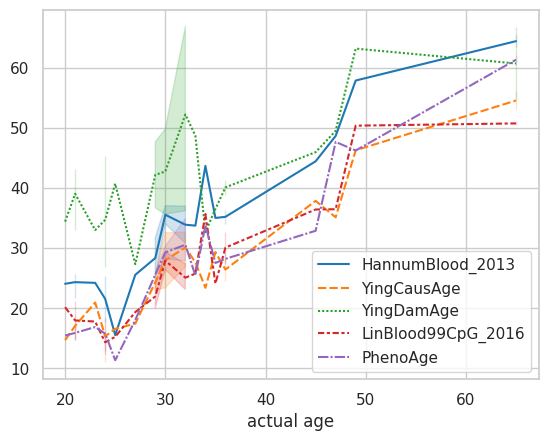

In [21]:
import seaborn as sns

sns.set_theme(style="whitegrid")
sns.lineplot(data=general, palette="tab10")

In [23]:
general.index

Index([32, 24, 65, 25, 32, 30, 21, 21, 21, 24, 24, 34, 36, 65, 49, 20, 29, 33,
       24, 45, 32, 29, 35, 30, 47, 32, 36, 27, 23],
      dtype='object', name='actual age')

In [24]:
general['actual age'] = general.index

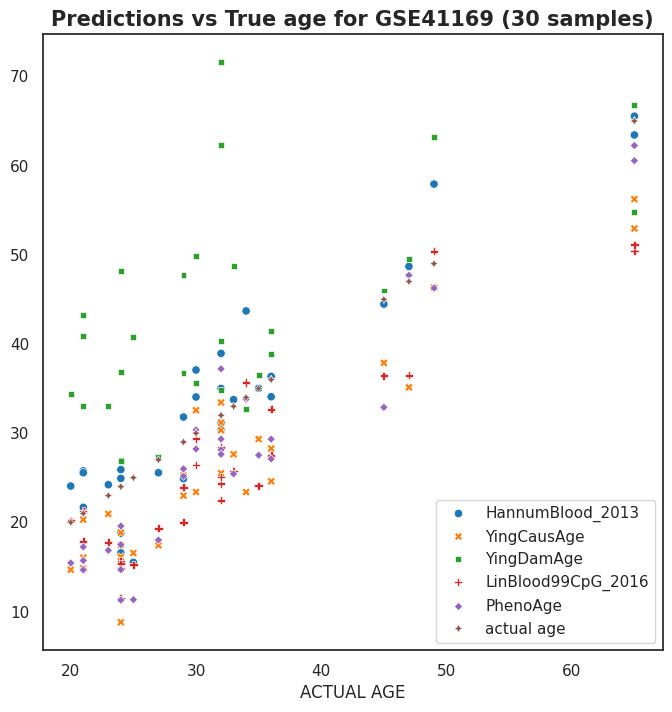

In [38]:
import matplotlib.pyplot as plt
sns.set_theme(style="white")
plt.figure(figsize=(8, 8))
sns.scatterplot(data=general, palette="tab10").set(xlabel='ACTUAL AGE')
plt.title('Predictions vs True age for GSE41169 (30 samples)', weight='bold').set_fontsize('15')